In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
strike = 165
underlying = 165
current = pd.to_datetime("2022-02-25")
expire = pd.to_datetime("2022-03-18")
rf = 0.0025
coupon = 0.0053
b = rf - coupon
days = (expire - current).days
ttm = days / 365

In [4]:
sigmas = [float(i)/1000 for i in range(100, 801)]

In [5]:
calls, puts = [], []
for sig in sigmas:
    call, put = call_put(underlying, strike, b, rf, sig, ttm)
    calls.append(call)
    puts.append(put)

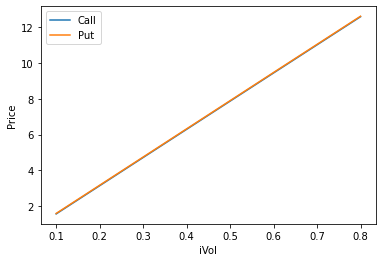

In [6]:
plt.plot(sigmas, calls, label="Call")
plt.plot(sigmas, puts, label="Put")
plt.xlabel('iVol')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
apple = pd.read_csv("./AAPL_Options.csv")

In [8]:
def funcall(parameters):
    x = parameters[0]
    call = parameters[1]
    
    d1 = (np.log(s/x) + t*(sig**2/2 + b))/(sig*(t**0.5))
    d2 = d1 - sig * (t**0.5)
    return s*np.e**((b-r)*t)*norm.cdf(d1) - x*np.e**(-r*t)*norm.cdf(d2) - call

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,3/18/2022,Call,135.0,30.175
1,AAPL,3/18/2022,Call,140.0,25.300
2,AAPL,3/18/2022,Call,145.0,20.525
3,AAPL,3/18/2022,Call,150.0,15.850
4,AAPL,3/18/2022,Call,155.0,11.525
5,AAPL,3/18/2022,Call,160.0,7.525
6,AAPL,3/18/2022,Call,165.0,4.225
7,AAPL,3/18/2022,Call,170.0,1.935
8,AAPL,3/18/2022,Call,175.0,0.715
9,AAPL,3/18/2022,Call,180.0,0.260
